# Подготовка данных

In [2005]:
%pip install ucimlrepo

In [2006]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import random
import math

In [2007]:
# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
Y = mushroom.data.targets

data = pd.concat([X, Y], axis=1)
data

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,e
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,e
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,e
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,p


Проверка отсутствующих значений

In [2008]:
X.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [2009]:
unique_values = []
for i in X['stalk-root'].values:
    if i not in unique_values and i is not None:
        unique_values.append(i)

X['stalk-root'].fillna(np.random.choice(unique_values), inplace=True)

<ipython-input-2009-05db89ee2efa>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['stalk-root'].fillna(np.random.choice(unique_values), inplace=True)


In [2010]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Отбор признаков

In [2011]:
columns_count = int(math.sqrt(len(X.columns)))
droppin_count = len(X.columns) - columns_count

In [2012]:
columns = X.columns.values

columns_to_drop = np.random.choice(columns, size=droppin_count, replace=False)

X = X.drop(columns_to_drop, axis=1)

In [2013]:
X

,gill-color,stalk-surface-above-ring,population,habitat
0,k,s,s,u
1,k,s,n,g
2,n,s,n,m
3,n,s,s,u
4,k,s,a,g
...,...,...,...,...
8119,y,s,c,l
8120,y,s,v,l
8121,n,s,c,l
8122,b,s,v,l


# Кодирование категориальных признаков

До кодирования

In [2014]:
X

,gill-color,stalk-surface-above-ring,population,habitat
0,k,s,s,u
1,k,s,n,g
2,n,s,n,m
3,n,s,s,u
4,k,s,a,g
...,...,...,...,...
8119,y,s,c,l
8120,y,s,v,l
8121,n,s,c,l
8122,b,s,v,l


In [2015]:
Y

,poisonous
0,p
1,e
2,e
3,p
4,e
...,...
8119,e
8120,e
8121,e
8122,p


In [2016]:
columns = X.columns.values

X = data[columns].apply(lambda col: col.astype('category').cat.codes)
Y = data['poisonous'].astype('category').cat.codes

После кодирования

In [2017]:
X

,gill-color,stalk-surface-above-ring,population,habitat
0,4,2,3,5
1,4,2,2,1
2,5,2,2,3
3,5,2,3,5
4,4,2,0,1
...,...,...,...,...
8119,11,2,1,2
8120,11,2,4,2
8121,5,2,1,2
8122,0,2,4,2


In [2018]:
Y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Length: 8124, dtype: int8

# Разделение данных на обучающую и тестовую выборки

In [2019]:
# Список индексов данных
indices = list(range(len(X)))

# Размер тестовой выборки
test_size = 0.2 # 20%

# Начальное состояние генератора случайных чисел
random.seed(42)

# Шафлим данные (чтобы потом не балансировать)
random.shuffle(indices)

split_index = int(len(X) * test_size)

X_train = X.iloc[indices[split_index:]]
X_test = X.iloc[indices[:split_index]]
Y_train = Y.iloc[indices[split_index:]]
Y_test = Y.iloc[indices[:split_index]]

Данные после разделения

In [2020]:
print(f'X = {X.shape}\nX_train = {X_train.shape}\nX_test = {X_test.shape}\nY = {Y.shape}\nY_train = {Y_train.shape}\nY_test = {Y_test.shape}')

X = (8124, 4)
X_train = (6500, 4)
X_test = (1624, 4)
Y = (8124,)
Y_train = (6500,)
Y_test = (1624,)


# Реализация дерева решений

Класс дерева решений

In [2021]:
class TreeNode:

    def __init__(self, left = None, right = None, class_name = None, feature = None, div_value = None):
        self.left = left
        self.right = right
        self.class_name = class_name
        self.feature = feature
        self.div_value = div_value

    def __str__(self):
        return f'(left = {self.left}; right  = {self.right}; class_name = {self.class_name}; feature = {self.feature}; div_value = {self.div_value})'

Вывод дерева в читаемом виде

In [2022]:
def tree_to_string(root, depth=0):

        indentation = '        ' * depth * 2
        format = '--' * (depth + 1)

        if root.class_name is not None:
            print(f"{indentation}|{format} class_name = {'Не кушать, ядовитый' if root.class_name == 1 else 'Ням-ням'}")

        else:
            feature = columns[root.feature]
            div_value = root.div_value

            print(f'{indentation}|{format} {feature} < {div_value}')
            tree_to_string(root.left, depth + 1)

            print(f'{indentation}|{format} {feature} >= {div_value}')
            tree_to_string(root.right, depth + 1)

Вычисление энтропии для определения чистоты подмножества

In [2023]:
def calculate_entropy(Y_values):
    if len(Y_values) == 0:
        return 0

    p1 = np.mean(Y_values == Y_values[0])
    p2 = 1 - p1

    if (p1  == 1 or p2 == 1):
        return 0

    return -(p1 * math.log2(p1) + p2 * math.log2(p2))

Вычисление информационного выигрыша при разбиении по данному признаку X

In [2024]:
def calculate_gain(X, Y):
    #  энтропия до разделения
    before = calculate_entropy(Y.values)

    #  находим уникальные значения признака и количество вхождений каждого уникального признака
    values, occurrences = np.unique(X, return_counts=True)
    total = len(Y.values)

    #  массив энтропий для того, чтобы получить взвешанную энтропию (ВЭ потом будет использоваться для определения выгоды от разделения по данному признаку)
    entropies = []
    #  пробегаюсь по всем уникальным значениям признака
    for i, value in enumerate(values):

        #  вычисляю вероятность (количество объектов с таким признаком / общее количество объектов)
        prob = occurrences[i] / total

        #  все метки данного значения X
        cur_labels = Y[X == value]

        #  выщитываю энтропию меток полученных значений меток для данного уникального значения
        tmp_entropy = prob * calculate_entropy(cur_labels.values)

        #  добавляю в массив энтропий
        entropies.append(tmp_entropy)

    return before - sum(entropies)

Построение модели

Способ ограничения: глубина дерева

In [2025]:
def build_nodes(X, Y, cur_depth, max_depth):
    Y_values = Y.values

    #  если все метки одинаковые, то энтропия == 0, значит нашли лист
    if len(np.unique(Y_values)) == 1:
        return TreeNode(class_name = Y_values[0])

    #  если текущая длина превысила предельную, то опеределяем класс по принципу большинства
    if (cur_depth >= max_depth):
        labels = np.unique(Y_values)
        label = Y_values[0]
        l1_count = 0
        for i in range(len(Y_values)):
            if Y_values[i] == label:
                l1_count += 1
        l2_count = len(Y_values) - l1_count
        return TreeNode(class_name = labels[0] if l1_count >= l2_count else labels[1])

    max_gain = 0
    final_feature_ind = None
    final_div_value = None

    # print(X)
    #  для каждого признака признакам
    for cur_column_ind in range(X.shape[1]):
        #  рассматриваем возможность разделения по каждому уникальному значению
        for div_value in np.unique(X.iloc[:, cur_column_ind]):
            #  делим
            left = X.iloc[:, cur_column_ind] < div_value
            right = X.iloc[:, cur_column_ind] >= div_value

            #  если нет смысла в разделении, пропускаем значение признака
            if (sum(left) == 0 or sum(right) == 0):
                continue

            #  высчитываем выигрыш
            cur_gain = calculate_gain(left, Y)
            #  запоминаем
            if cur_gain > max_gain:
                max_gain = cur_gain
                final_feature_ind = cur_column_ind
                final_div_value = div_value

    #  если выигрыша не обнаружено, поступаем как в случае с превышением глубины (большинство)
    if (max_gain == 0 or final_feature_ind is None or final_div_value is None):
        labels = np.unique(Y_values)
        label = Y_values[0]
        l1_count = 0
        for i in range(len(Y_values)):
            if Y_values[i] == label:
                l1_count += 1
        l2_count = len(Y_values) - l1_count
        return TreeNode(class_name = labels[0] if l1_count >= l2_count else labels[1])

    #  определяем индексы разделений
    left_X_ind = X.iloc[:, final_feature_ind] < final_div_value
    rigth_X_ind = X.iloc[:, final_feature_ind] >= final_div_value

    #  строим левое и правое деревья
    left_tree_node = build_nodes(X[left_X_ind], Y[left_X_ind], cur_depth + 1, max_depth)
    right_tree_node = build_nodes(X[rigth_X_ind], Y[rigth_X_ind], cur_depth + 1, max_depth)

    return TreeNode(left = left_tree_node,
                    right = right_tree_node,
                    feature = final_feature_ind,
                    div_value = final_div_value)

Создание модели на тренировочных данных и вывод в удобном виде

In [2026]:
tree_depth = 4
model = build_nodes(X_train, Y_train, 0, tree_depth)

tree_to_string(model)

|-- gill-color < 1
                |---- class_name = Не кушать, ядовитый
|-- gill-color >= 1
                |---- stalk-surface-above-ring < 2
                                |------ population < 4
                                                |-------- habitat < 1
                                                                |---------- class_name = Не кушать, ядовитый
                                                |-------- habitat >= 1
                                                                |---------- class_name = Ням-ням
                                |------ population >= 4
                                                |-------- gill-color < 10
                                                                |---------- class_name = Не кушать, ядовитый
                                                |-------- gill-color >= 10
                                                                |---------- class_name = Ням-ням
                |---- stalk-surface-above-

Предсказание на тестовых данных

In [2027]:
def predict(X_object_values, root):
    if root.class_name is not None:
        return root.class_name

    if (X_object_values[root.feature] < root.div_value):
        return predict(X_object_values, root.left)
    else:
        return predict(X_object_values, root.right)

In [2028]:
def predict_all(X, model):
    X_values = X.values
    Y_values = Y.values
    prediction = []
    for row in X_values:
        prediction.append(predict(row, model))
    return prediction

In [2029]:
prediction = predict_all(X_test, model)

# Оценка алгоритма

Посторим матрицу ошибок:

In [2030]:
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

for i in range(len(Y_test)):
    if prediction[i] == 1:
        if Y_test.values[i] == 1:
            true_positive += 1
        else:
            false_positive += 1
    else:
        if Y_test.values[i] == 1:
            false_negative += 1
        else:
            true_negative += 1

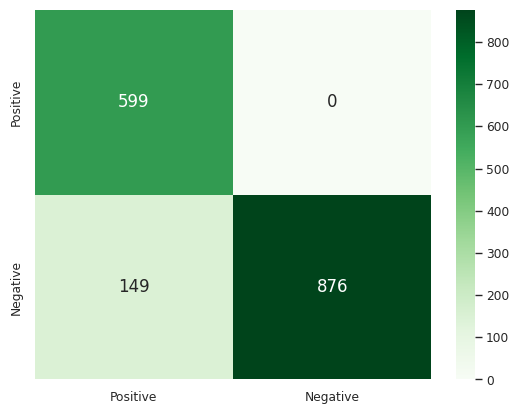

In [2031]:
confusion_matrix = [[true_positive, false_positive], [false_negative, true_negative]]
cm_indeces = ['Positive', 'Negative']
df_cm = pd.DataFrame(confusion_matrix, index = cm_indeces, columns = cm_indeces)
sn.set_context("paper", rc={"font.size":12,"axes.titlesize":8,"axes.labelsize":5})
sn.heatmap(df_cm, annot=True, fmt='.0f', cmap="Greens")
plt.show()

## accuracy (точность предсказания)

In [2032]:
accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
print(f'accuracy = {accuracy * 100}%')

accuracy = 90.82512315270937%


## precision (точность, если я скажу, что гриб ядовитый)

In [2033]:
precision = (true_positive) / (true_positive + false_positive)
print(f'precision = {precision * 100}%')

precision = 100.0%


## recall (если я скажу, что гриб ядовитый, доверяйте мне на recall процентов)

In [2034]:
recall = (true_positive) / (true_positive + false_negative)
print(f'recall = {recall * 100}%')

recall = 80.08021390374331%


# Оценка качества модели

## AUC-ROC (площадь под кривой ошибок)

Подсчёт TPR и FPR

In [2035]:
def get_tpr_fpr(div_value, Y_test, probas):
    predicted_values = []
    for i in range(len(probas)):
        if probas[i] >= div_value:
            predicted_values.append(1)
        else:
            predicted_values.append(0)
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    for i in range(len(Y_test)):
        if predicted_values[i] == 1:
            if Y_test.values[i] == 1:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if Y_test.values[i] == 1:
                false_negative += 1
            else:
                true_negative += 1

    true_positive_rate = (true_positive) / (true_positive + false_negative)
    false_positive_rate = (false_positive) / (false_positive + true_negative)
    return true_positive_rate, false_positive_rate

In [2036]:
def get_all_tprs(div_values, Y_test, probas):
    tprs = []
    for div_value in div_values:
        tprs.append(get_tpr_fpr(div_value, Y_test, probas)[0])
    return tprs

def get_all_fprs(div_values, Y_test, probas):
    fprs = []
    for div_value in div_values:
        fprs.append(get_tpr_fpr(div_value, Y_test, probas)[1])
    return fprs

В качестве вероятности правильной классификации возьму глубину дерева (чем она меньше, тем более точной является классификация)

In [2037]:
print(f'Исходная глубина дерева: {tree_depth}')

Исходная глубина дерева: 4


Подсчет вероятности как глубины

In [2038]:
def calculate_proba(X_values, root, depth=0):
    if root.class_name is not None:
        return 1 / depth

    if (X_values[root.feature] < root.div_value):
        return calculate_proba(X_values, root.left, depth + 1)
    else:
        return calculate_proba(X_values, root.right, depth + 1)

In [2039]:
def calculate_probas(X, model):
    X_values = X.values
    probas = []
    for row in X_values:
        probas.append(calculate_proba(row, model))
    return probas

Получение вероятностей вместо точных предсказаний

In [2040]:
probas = np.sort(calculate_probas(X_test, model))
unique_probas = np.unique(probas)

In [2041]:
tprs = get_all_tprs(np.unique(probas), Y_test, probas)
fprs = get_all_fprs(np.unique(probas), Y_test, probas)

In [2042]:
tprs

[1.0, 0.3181818181818182, 0.20989304812834225]

In [2043]:
fprs

[1.0, 0.3687214611872146, 0.22146118721461186]

Визуализация Receiver Operating Characteristic curve

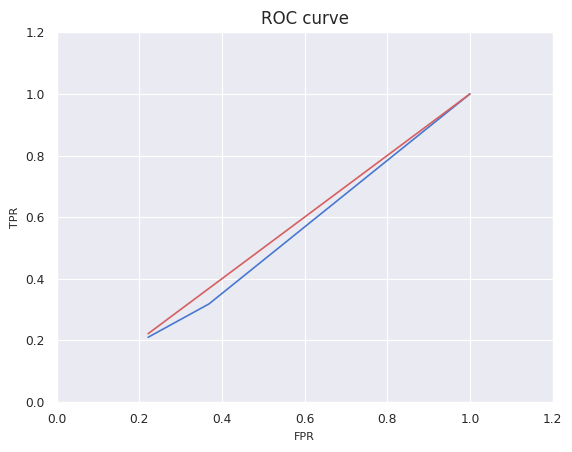

In [2044]:
plt.title('ROC curve', fontsize=12)
plt.xlabel('FPR', fontsize=8)
plt.ylabel('TPR', fontsize=8)
plt.plot(fprs, tprs, 'b', fprs, fprs, 'r')
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.show()

Подсчет площади под кривой (метод трапеций)

In [2045]:
auc_roc = 0
for i in range(len(fprs) - 1):
    s = (tprs[i] + tprs[i+1]) / 2 * (fprs[i + 1] - fprs[i])
    auc_roc += s
print(f'auc_roc = {abs(auc_roc)}')

auc_roc = 0.45495217078113936


## AUC-PR

Подсчет precisions и recalls

In [2046]:
def get_precision_recall(div_value, Y_test, probas):
    predicted_values = []
    for i in range(len(probas)):
        if probas[i] >= div_value:
            predicted_values.append(1)
        else:
            predicted_values.append(0)
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0

    for i in range(len(Y_test)):
        if predicted_values[i] == 1:
            if Y_test.values[i] == 1:
                true_positive += 1
            else:
                false_positive += 1
        else:
            if Y_test.values[i] == 1:
                false_negative += 1
            else:
                true_negative += 1

    precision = (true_positive) / (true_positive + false_positive)
    recall = (true_positive) / (true_positive + false_negative)

    return precision, recall

In [2047]:
def get_all_precisions(div_values, Y_test, probas):
    precisions = []
    for div_value in div_values:
        precisions.append(get_precision_recall(div_value, Y_test, probas)[0])
    return precisions

def get_all_recalls(div_values, Y_test, probas):
    recalls = []
    for div_value in div_values:
        recalls.append(get_precision_recall(div_value, Y_test, probas)[1])
    return recalls

Получение precisions и recalls

In [2048]:
precisions = get_all_precisions(np.unique(probas), Y_test, probas)
recalls = get_all_recalls(np.unique(probas), Y_test, probas)

In [2049]:
precisions

[0.4605911330049261, 0.42424242424242425, 0.4472934472934473]

In [2050]:
recalls

[1.0, 0.3181818181818182, 0.20989304812834225]

Визуализация precision-recall curve

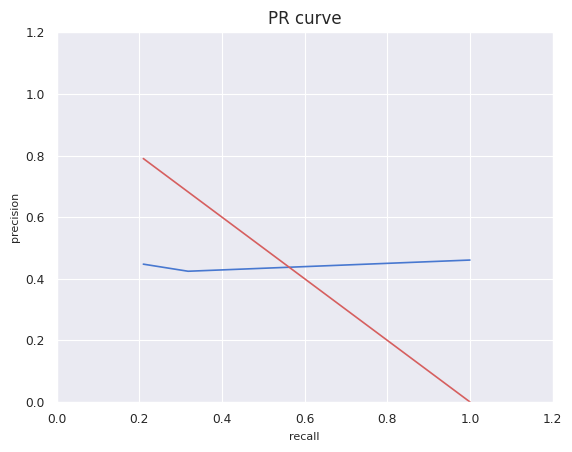

In [2051]:
plt.title('PR curve', fontsize=12)
plt.xlabel('recall', fontsize=8)
plt.ylabel('precision', fontsize=8)
plt.plot(recalls, precisions, 'b', recalls, [1 - i for i in recalls], 'r')
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.show()

In [2052]:
auc_pr = 0
for i in range(len(fprs) - 1):
    s = (precisions[i] + precisions[i+1]) / 2 * (recalls[i + 1] - recalls[i])
    auc_pr += s
print(f'auc_roc = {abs(auc_pr)}')

auc_roc = 0.34883657740010315
